In [8]:
from google.colab import files
uploaded = files.upload()


Saving BolsaFamilia_Pagamentos.csv to BolsaFamilia_Pagamentos.csv


In [10]:
import pandas as pd

df = pd.read_csv('BolsaFamilia_Pagamentos.csv', sep=';', encoding='latin1')
df.head()

,MÊS REFERÊNCIA,MÊS COMPETÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
0,202111,202105,AC,645,BUJARI,***.842.612-**,16390679204,MARIA EDILEUZA BARROS GOMES,65
1,202111,202105,AL,2713,BATALHA,***.369.544-**,21239928310,ANA CRISTINA GOMES DA SILVA,161
2,202111,202105,AL,2713,BATALHA,***.874.894-**,20909182277,ANA LUCIA DOS SANTOS,353
3,202111,202105,AL,2713,BATALHA,***.806.204-**,16546368049,THIAGO MARIANO TENORIO,25
4,202111,202105,AL,2643,ESTRELA DE ALAGOAS,***.433.554-**,23700059961,AMANDA KELLY MOURA DA LUZ,301


In [11]:
df.columns = [col.lower().replace(' ', '_').replace('ç', 'c').replace('ã', 'a') for col in df.columns]
df.head()

,mês_referência,mês_competência,uf,código_município_siafi,nome_município,cpf_favorecido,nis_favorecido,nome_favorecido,valor_parcela
0,202111,202105,AC,645,BUJARI,***.842.612-**,16390679204,MARIA EDILEUZA BARROS GOMES,65
1,202111,202105,AL,2713,BATALHA,***.369.544-**,21239928310,ANA CRISTINA GOMES DA SILVA,161
2,202111,202105,AL,2713,BATALHA,***.874.894-**,20909182277,ANA LUCIA DOS SANTOS,353
3,202111,202105,AL,2713,BATALHA,***.806.204-**,16546368049,THIAGO MARIANO TENORIO,25
4,202111,202105,AL,2643,ESTRELA DE ALAGOAS,***.433.554-**,23700059961,AMANDA KELLY MOURA DA LUZ,301


In [13]:
df['valor_parcela'] = pd.to_numeric(df['valor_parcela'], errors='coerce')


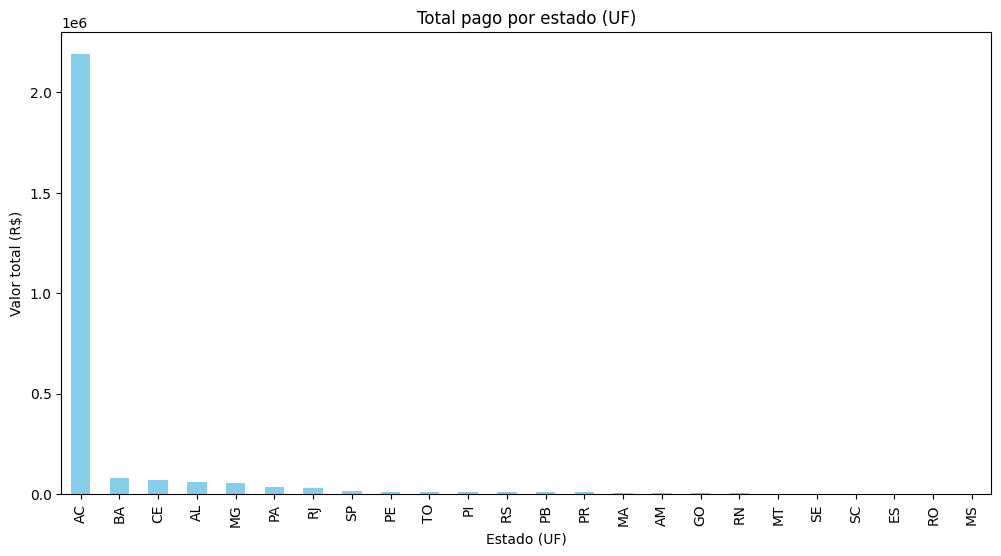

In [14]:
import matplotlib.pyplot as plt

pagamentos_por_uf = df.groupby('uf')['valor_parcela'].sum().sort_values(ascending=False)

pagamentos_por_uf.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Total pago por estado (UF)')
plt.ylabel('Valor total (R$)')
plt.xlabel('Estado (UF)')
plt.show()


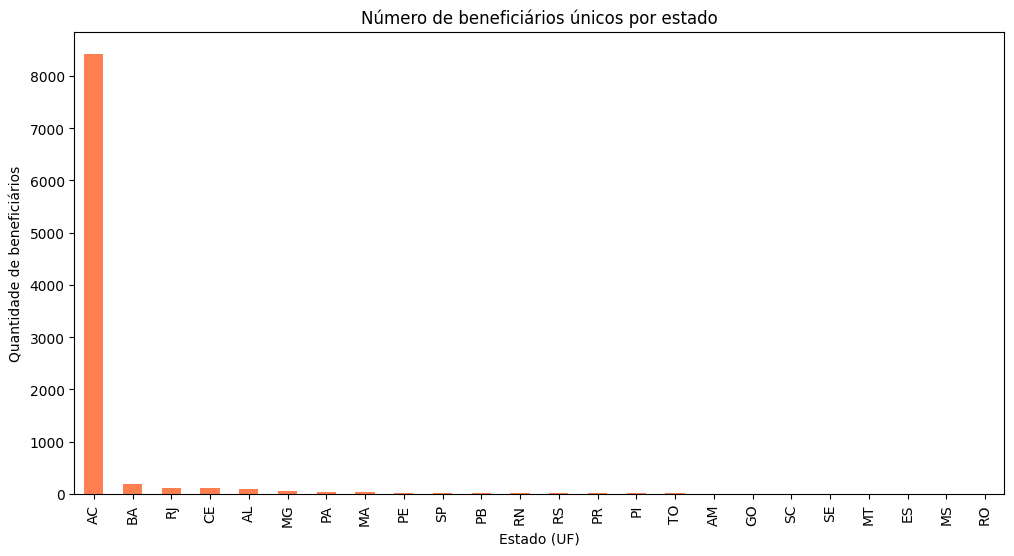

In [16]:
beneficiarios_por_uf = df.groupby('uf')['nis_favorecido'].nunique().sort_values(ascending=False)

beneficiarios_por_uf.plot(kind='bar', figsize=(12,6), color='coral')
plt.title('Número de beneficiários únicos por estado')
plt.ylabel('Quantidade de beneficiários')
plt.xlabel('Estado (UF)')
plt.show()


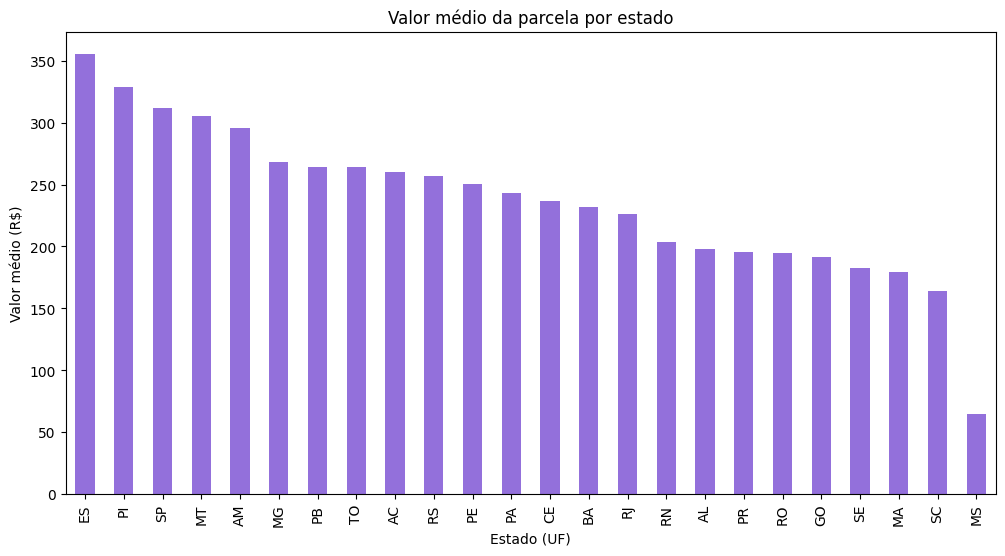

In [19]:
media_por_uf = df.groupby('uf')['valor_parcela'].mean().sort_values(ascending=False)

media_por_uf.plot(kind='bar', figsize=(12,6), color='mediumpurple')
plt.title('Valor médio da parcela por estado')
plt.ylabel('Valor médio (R$)')
plt.xlabel('Estado (UF)')
plt.show()


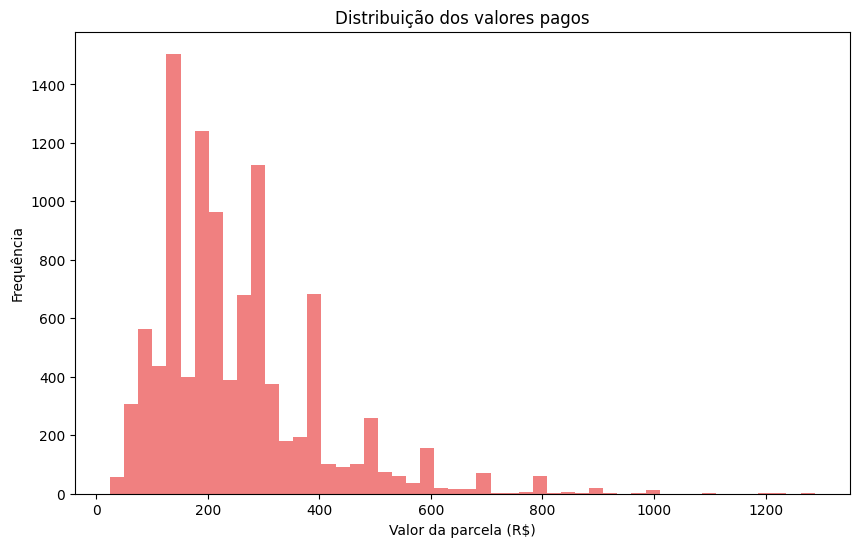

In [20]:
plt.figure(figsize=(10,6))
plt.hist(df['valor_parcela'], bins=50, color='lightcoral')
plt.title('Distribuição dos valores pagos')
plt.xlabel('Valor da parcela (R$)')
plt.ylabel('Frequência')
plt.show()


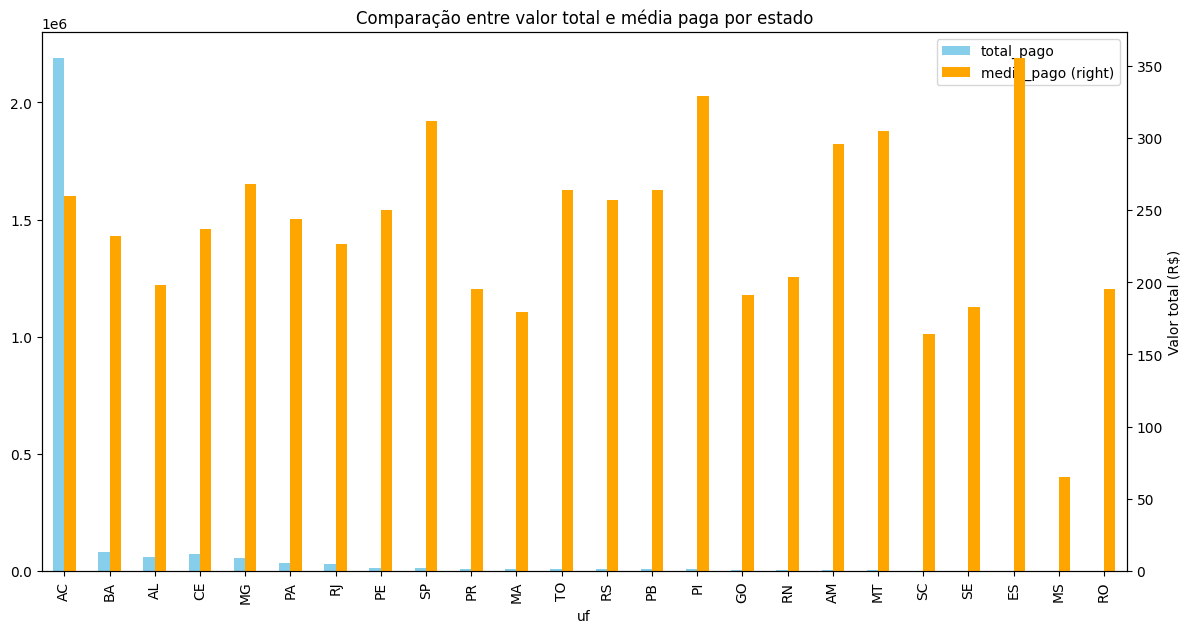

,total_pago,media_pago,proporcao_media_total
uf,,,
AC,2191386,259.981730,1.095385
BA,81544,231.659091,26.230114
AL,60232,198.131579,30.371711
CE,71251,236.714286,30.674419
MG,53600,268.000000,46.165000
PA,32374,243.413534,69.421053
RJ,28068,226.354839,74.459677
PE,12013,250.270833,192.354167
SP,13716,311.727273,209.840909


In [21]:
# Total pago por estado
total_por_uf = df.groupby('uf')['valor_parcela'].sum()

# Média paga por estado
media_por_uf = df.groupby('uf')['valor_parcela'].mean()

# Criar DataFrame para comparar
df_desigualdade = pd.DataFrame({
    'total_pago': total_por_uf,
    'media_pago': media_por_uf
})

df_desigualdade['proporcao_media_total'] = df_desigualdade['media_pago'] / (df_desigualdade['total_pago'] / df['nis_favorecido'].nunique())

df_desigualdade = df_desigualdade.sort_values(by='proporcao_media_total')

df_desigualdade.plot(kind='bar', y=['total_pago', 'media_pago'], figsize=(14,7), secondary_y='media_pago', color=['skyblue', 'orange'])
plt.title('Comparação entre valor total e média paga por estado')
plt.ylabel('Valor total (R$)')
plt.show()

df_desigualdade


In [23]:
df_desigualdade = df_desigualdade.sort_values(by='proporcao_media_total', ascending=False)
df_desigualdade


,total_pago,media_pago,proporcao_media_total
uf,,,
RO,195,195.000000,9233.000000
ES,711,355.500000,4616.500000
MS,130,65.000000,4616.500000
SE,1097,182.833333,1538.833333
SC,986,164.333333,1538.833333
MT,2135,305.000000,1319.000000
AM,5023,295.470588,543.117647
RN,4887,203.625000,384.708333
GO,4972,191.230769,355.115385


In [24]:
print(df_desigualdade)


    total_pago  media_pago  proporcao_media_total
uf                                               
RO         195  195.000000            9233.000000
ES         711  355.500000            4616.500000
MS         130   65.000000            4616.500000
SE        1097  182.833333            1538.833333
SC         986  164.333333            1538.833333
MT        2135  305.000000            1319.000000
AM        5023  295.470588             543.117647
RN        4887  203.625000             384.708333
GO        4972  191.230769             355.115385
PI        9205  328.750000             329.750000
PB        8180  263.870968             297.838710
RS        8214  256.687500             288.531250
TO        9235  263.857143             263.800000
MA        7000  179.487179             236.743590
PR        8015  195.487805             225.195122
SP       13716  311.727273             209.840909
PE       12013  250.270833             192.354167
RJ       28068  226.354839              74.459677


In [25]:
estado_mais_recebe = df_desigualdade['total_pago'].idxmax()
valor_mais_recebe = df_desigualdade['total_pago'].max()

print(f"O estado que mais recebeu é {estado_mais_recebe} com um total de R$ {valor_mais_recebe:,.2f}")


O estado que mais recebeu é AC com um total de R$ 2,191,386.00


In [26]:
estado_mais_pobre = df_desigualdade['media_pago'].idxmin()
valor_mais_pobre = df_desigualdade['media_pago'].min()

print(f"O estado com menor valor médio pago por beneficiário é {estado_mais_pobre} com média de R$ {valor_mais_pobre:,.2f} por parcela")


O estado com menor valor médio pago por beneficiário é MS com média de R$ 65.00 por parcela


Proposta de Solução para Redução da Pobreza com Base na Análise dos Dados do Bolsa Família


A análise dos dados do Bolsa Família revela um padrão importante: os estados que apresentam maiores oportunidades de emprego, educação e infraestrutura tendem a receber valores menores do programa, enquanto os estados com maior vulnerabilidade socioeconômica dependem mais desse apoio financeiro. Isso ocorre porque o Bolsa Família é um programa direcionado para reduzir a pobreza extrema e promover a inclusão social das famílias mais vulneráveis.

Estados com maior desenvolvimento econômico e social geralmente têm uma menor proporção da população em situação de pobreza extrema, graças ao acesso ampliado a empregos formais, melhores condições educacionais e infraestrutura pública eficiente. Por outro lado, estados com menos oportunidades e maior desigualdade social dependem mais das transferências do programa para garantir a sobrevivência básica de suas famílias.

Esse cenário reforça a importância do Bolsa Família como uma rede de proteção social, mas também evidencia a necessidade de políticas públicas complementares que promovam o desenvolvimento regional, ampliem o acesso à educação de qualidade, fomentem a geração de emprego e renda, e melhorem a infraestrutura nas regiões mais carentes.

Assim, para diminuir efetivamente a pobreza e a desigualdade no país, é fundamental aliar os programas de transferência direta de renda a estratégias de longo prazo que promovam a inclusão econômica e social, permitindo que cada vez menos famílias dependam exclusivamente desses benefícios.

